In [1]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


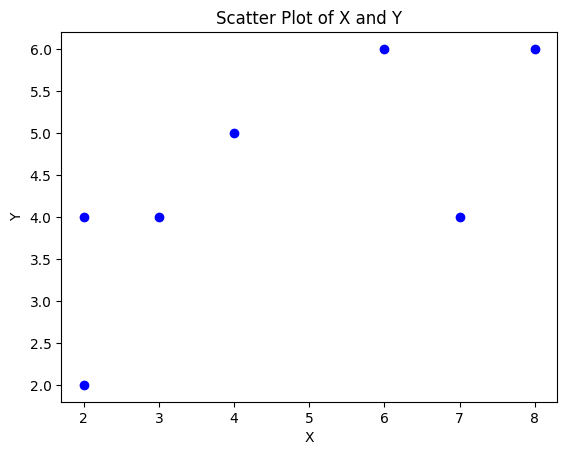

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
df = pd.read_csv('dataset/Agustus-senin.csv')

# Membuat scatter plot
plt.scatter(df['X'], df['Y'], c='blue', marker='o')

# Menambahkan judul dan label sumbu
plt.title('Scatter Plot of X and Y')
plt.xlabel('X')
plt.ylabel('Y')

# Menampilkan grid
# plt.grid(True)

# Menampilkan plot
plt.show()

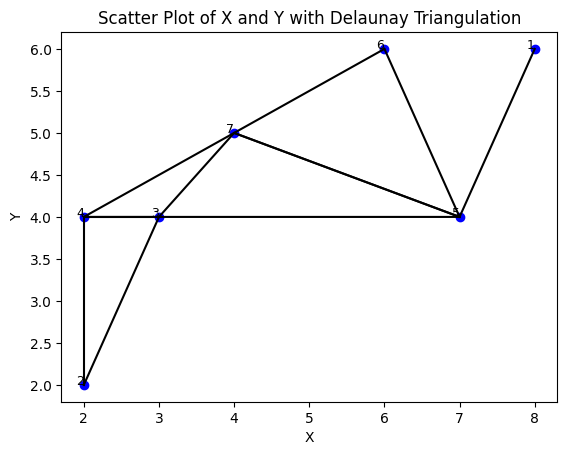

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# Membaca data dari file CSV
df = pd.read_csv('dataset/Agustus-senin.csv')

# Membuat scatter plot
plt.scatter(df['X'], df['Y'], c='blue', marker='o')

# Menambahkan label pada setiap titik
for i, (x, y) in enumerate(zip(df['X'], df['Y'])):
    plt.text(x, y, str(i + 1), fontsize=9, ha='right')

# Melakukan Delaunay triangulation
points = df[['X', 'Y']].values
tri = Delaunay(points)

# Menggambar triangulation
for simplex in tri.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

# Menambahkan judul dan label sumbu
plt.title('Scatter Plot of X and Y with Delaunay Triangulation')
plt.xlabel('X')
plt.ylabel('Y')

# Menampilkan plot
plt.show()


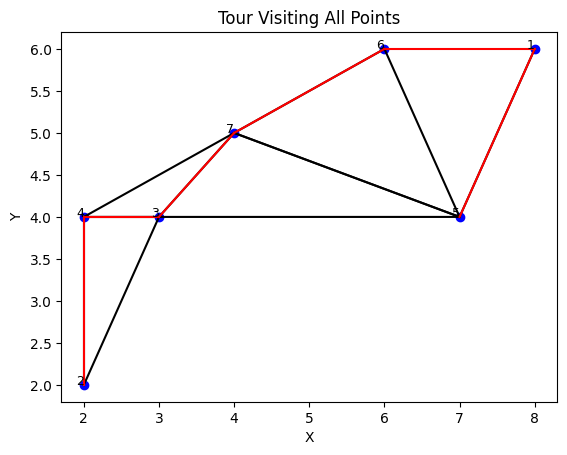

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import numpy as np
from scipy.spatial import distance_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

# Membaca data dari file CSV
df = pd.read_csv('dataset/Agustus-senin.csv')

# Membuat scatter plot
plt.scatter(df['X'], df['Y'], c='blue', marker='o')

# Menambahkan label pada setiap titik
for i, (x, y) in enumerate(zip(df['X'], df['Y'])):
    plt.text(x, y, str(i + 1), fontsize=9, ha='right')

# Melakukan Delaunay triangulation
points = df[['X', 'Y']].values
tri = Delaunay(points)

# Menggambar triangulation
for simplex in tri.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

# Menghitung matriks jarak antar titik
dist_matrix = distance_matrix(points, points)

# Membuat minimum spanning tree (MST)
mst = minimum_spanning_tree(dist_matrix)

# Menggambar jalur yang mengunjungi semua titik berdasarkan MST
edges = np.array(np.where(mst.toarray() != 0)).T
for edge in edges:
    p1 = points[edge[0]]
    p2 = points[edge[1]]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r-')

# Menambahkan judul dan label sumbu
plt.title('Tour Visiting All Points')
plt.xlabel('X')
plt.ylabel('Y')

# Menampilkan plot
plt.show()


In [19]:
import pandas as pd
import numpy as np
import math
from heapq import heappop, heappush

def euclidean_distance(point1, point2):
    # Calculate the Euclidean distance between two points
    return math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

def a_star(start, goal, graph):
    open_list = []
    heappush(open_list, (0, start))  # (f-score, node)
    
    g_score = {start: 0}
    f_score = {start: euclidean_distance(start, goal)}
    
    came_from = {}
    
    while open_list:
        current_f, current_node = heappop(open_list)
        
        if current_node == goal:
            # If reached the goal, return the path
            path = []
            total_distance = g_score[current_node]
            while current_node in came_from:
                path.append(current_node)
                current_node = came_from[current_node]
            path.append(start)
            path.reverse()
            return path, total_distance, f_score[goal] - total_distance
        
        for neighbor in graph[current_node]:
            tentative_g_score = g_score[current_node] + euclidean_distance(current_node, neighbor)
            
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current_node
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + euclidean_distance(neighbor, goal)
                heappush(open_list, (f_score[neighbor], neighbor))
    
    return None, None, None  # If no path found

# Load dataset
df = pd.read_csv('dataset/Agustus-senin.csv')

# Initialize the graph
graph = {}
for index, row in df.iterrows():
    node = (row['X'], row['Y'])
    neighbors = []
    for idx, r in df.iterrows():
        if (r['X'], r['Y']) != node:
            neighbors.append((r['X'], r['Y']))
    graph[node] = neighbors

# The starting and ending points
start_point = (df.iloc[0]['X'], df.iloc[0]['Y'])
end_point = (df.iloc[-1]['X'], df.iloc[-1]['Y'])

# Use the A* algorithm to find the shortest path
total_distance_traveled = 0
current_point = start_point
for i in range(len(df) - 1):
    next_point = (df.iloc[i]['X'], df.iloc[i]['Y'])
    next_next_point = (df.iloc[i+1]['X'], df.iloc[i+1]['Y'])
    distance = euclidean_distance(current_point, next_point)
    total_distance_traveled += distance
    print(f"\nDistance {i+1}: {current_point} to {next_point} = {distance} units")
    print(f"Total current distance: {total_distance_traveled} units")
    print(f"Distance to be traveled: {euclidean_distance(next_point, next_next_point)} units")
    current_point = next_point

print("\nTotal distance traveled:", total_distance_traveled, "units")



Distance 1: (8, 6) to (8, 6) = 0.0 units
Total current distance: 0.0 units
Distance to be traveled: 7.211102550927978 units

Distance 2: (8, 6) to (2, 2) = 7.211102550927978 units
Total current distance: 7.211102550927978 units
Distance to be traveled: 2.23606797749979 units

Distance 3: (2, 2) to (3, 4) = 2.23606797749979 units
Total current distance: 9.447170528427769 units
Distance to be traveled: 1.0 units

Distance 4: (3, 4) to (2, 4) = 1.0 units
Total current distance: 10.447170528427769 units
Distance to be traveled: 5.0 units

Distance 5: (2, 4) to (7, 4) = 5.0 units
Total current distance: 15.447170528427769 units
Distance to be traveled: 2.23606797749979 units

Distance 6: (7, 4) to (6, 6) = 2.23606797749979 units
Total current distance: 17.68323850592756 units
Distance to be traveled: 2.23606797749979 units

Total distance traveled: 17.68323850592756 units



Distance 1: (8, 6) to (8, 6) = 0.0 units
Total current distance: 0.0 units
Distance to be traveled: 7.211102550927978 units

Distance 2: (8, 6) to (2, 2) = 7.211102550927978 units
Total current distance: 7.211102550927978 units
Distance to be traveled: 2.23606797749979 units

Distance 3: (2, 2) to (3, 4) = 2.23606797749979 units
Total current distance: 9.447170528427769 units
Distance to be traveled: 1.0 units

Distance 4: (3, 4) to (2, 4) = 1.0 units
Total current distance: 10.447170528427769 units
Distance to be traveled: 5.0 units

Distance 5: (2, 4) to (7, 4) = 5.0 units
Total current distance: 15.447170528427769 units
Distance to be traveled: 2.23606797749979 units

Distance 6: (7, 4) to (6, 6) = 2.23606797749979 units
Total current distance: 17.68323850592756 units
Distance to be traveled: 2.23606797749979 units

Total distance traveled: 17.68323850592756 units


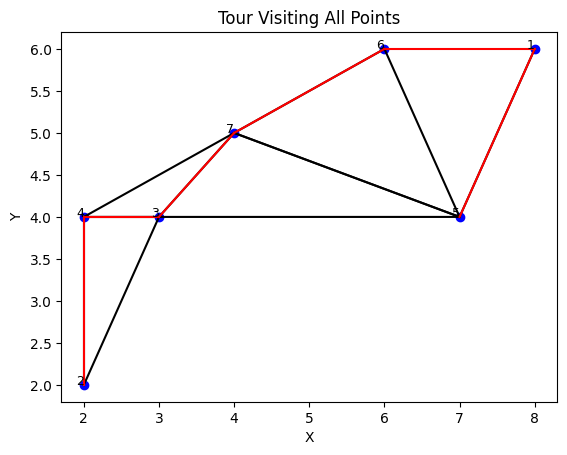

In [20]:
import pandas as pd
import numpy as np
import math
from heapq import heappop, heappush
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from scipy.spatial import distance_matrix
from scipy.sparse.csgraph import minimum_spanning_tree

def euclidean_distance(point1, point2):
    # Calculate the Euclidean distance between two points
    return math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)

def a_star(start, goal, graph):
    open_list = []
    heappush(open_list, (0, start))  # (f-score, node)
    
    g_score = {start: 0}
    f_score = {start: euclidean_distance(start, goal)}
    
    came_from = {}
    
    while open_list:
        current_f, current_node = heappop(open_list)
        
        if current_node == goal:
            # If reached the goal, return the path
            path = []
            total_distance = g_score[current_node]
            while current_node in came_from:
                path.append(current_node)
                current_node = came_from[current_node]
            path.append(start)
            path.reverse()
            return path, total_distance, f_score[goal] - total_distance
        
        for neighbor in graph[current_node]:
            tentative_g_score = g_score[current_node] + euclidean_distance(current_node, neighbor)
            
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current_node
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + euclidean_distance(neighbor, goal)
                heappush(open_list, (f_score[neighbor], neighbor))
    
    return None, None, None  # If no path found

# Load dataset
df = pd.read_csv('dataset/Agustus-senin.csv')

# Initialize the graph
graph = {}
for index, row in df.iterrows():
    node = (row['X'], row['Y'])
    neighbors = []
    for idx, r in df.iterrows():
        if (r['X'], r['Y']) != node:
            neighbors.append((r['X'], r['Y']))
    graph[node] = neighbors

# The starting and ending points
start_point = (df.iloc[0]['X'], df.iloc[0]['Y'])
end_point = (df.iloc[-1]['X'], df.iloc[-1]['Y'])

# Use the A* algorithm to find the shortest path
total_distance_traveled = 0
current_point = start_point
for i in range(len(df) - 1):
    next_point = (df.iloc[i]['X'], df.iloc[i]['Y'])
    next_next_point = (df.iloc[i+1]['X'], df.iloc[i+1]['Y'])
    distance = euclidean_distance(current_point, next_point)
    total_distance_traveled += distance
    print(f"\nDistance {i+1}: {current_point} to {next_point} = {distance} units")
    print(f"Total current distance: {total_distance_traveled} units")
    print(f"Distance to be traveled: {euclidean_distance(next_point, next_next_point)} units")
    current_point = next_point

print("\nTotal distance traveled:", total_distance_traveled, "units")

# Membuat scatter plot
plt.scatter(df['X'], df['Y'], c='blue', marker='o')

# Menambahkan label pada setiap titik
for i, (x, y) in enumerate(zip(df['X'], df['Y'])):
    plt.text(x, y, str(i + 1), fontsize=9, ha='right')

# Melakukan Delaunay triangulation
points = df[['X', 'Y']].values
tri = Delaunay(points)

# Menggambar triangulation
for simplex in tri.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

# Menghitung matriks jarak antar titik
dist_matrix = distance_matrix(points, points)

# Membuat minimum spanning tree (MST)
mst = minimum_spanning_tree(dist_matrix)

# Menggambar jalur yang mengunjungi semua titik berdasarkan MST
edges = np.array(np.where(mst.toarray() != 0)).T
for edge in edges:
    p1 = points[edge[0]]
    p2 = points[edge[1]]
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'r-')

# Menambahkan judul dan label sumbu
plt.title('Tour Visiting All Points')
plt.xlabel('X')
plt.ylabel('Y')

# Menampilkan plot
plt.show()
